In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial

In [2]:
dict_month = {'Marzo': 3, 'Abril':4, 'Mayo':5, 'Junio':6, 'Julio':7, 'Agosto':8,
              'Septiembre':9, 'Octubre':10, 'Noviembre':11, 'Diciembre':12}

# Aggregated data

In [3]:
def get_df(data, month):
    dia_columns = [x for x in data.columns if 'DIA' in x]

    for col in dia_columns:
        data[col + '_abierto'] = (data[col] == "Abierto").astype(int)
        data[col + '_cerrado'] = (data[col] == "Cerrado").astype(int)
        data[col + '_cuarentena'] = (data[col] == "En cuarentena").astype(int)

    abierto_dia_columns = [x for x in data.columns if '_abierto' in x]
    cerrado_dia_columns = [x for x in data.columns if '_cerrado' in x]
    curentena_dia_columns = [x for x in data.columns if '_cuarentena' in x]

    col1 = data[abierto_dia_columns].mean().values
    col2 = data[cerrado_dia_columns].mean().values
    col3 = data[curentena_dia_columns ].mean().values

    df = pd.DataFrame([col1,col2,col3]).T
    df.columns = ['Open', 'Closed', 'Quarantine']
    df = np.round(100*df, 3)
    df['month'] = dict_month[month]
    df['day']= [int(x[3:]) for x in dia_columns]
    
    return df

In [4]:
for file in os.listdir():
    if 'csv' in file:
        print(file)

Apertura_EE_2021_Abril.csv
Apertura_EE_2021_Agosto.csv
Apertura_EE_2021_Diciembre.csv
Apertura_EE_2021_Julio.csv
Apertura_EE_2021_Junio.csv
Apertura_EE_2021_Marzo.csv
Apertura_EE_2021_Mayo.csv
Apertura_EE_2021_Noviembre.csv
Apertura_EE_2021_Octubre.csv
Apertura_EE_2021_Septiembre.csv
EE_18.csv
simce2m2022_alu_mrun_final_SEG.csv
simce4b2022_alu_mrun_final_SEG.csv
weekly_school_openings_county_2021_chile.csv
WHO-COVID-19-global-data.csv


In [5]:
from datetime import datetime

# Create a function to calculate week number
def week_of_year(row):
    date = datetime(2021, int(row['month']), int(row['day']))
    return date.isocalendar()[1]

In [6]:
dict_df = {}
dict_dep = {}
j = 0
for dep in [[1,2], [3,5], [4], [6]]:

    for case in ['Apertura_EE_2021_Marzo.csv','Apertura_EE_2021_Abril.csv','Apertura_EE_2021_Mayo.csv',
                 'Apertura_EE_2021_Junio.csv','Apertura_EE_2021_Julio.csv','Apertura_EE_2021_Agosto.csv',
                 'Apertura_EE_2021_Septiembre.csv','Apertura_EE_2021_Octubre.csv','Apertura_EE_2021_Noviembre.csv',
                 'Apertura_EE_2021_Diciembre.csv']:

        print(case)
        data = pd.read_csv(case, sep = ';')
        month = case.split('_')[-1].split('.')[0]

        df = get_df(data[data.DEPENDENCIA.isin(dep)], month)
        dict_df[month] = df

        if month == 'Marzo':
            df_tot = df.copy()
        else:
            df_tot = pd.concat([df_tot, df])

    df_tot['Week_Number'] = df_tot.apply(week_of_year, axis=1)
    dict_dep[j] = df_tot
    j+=1

Apertura_EE_2021_Marzo.csv


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col + '_abierto'] = (data[col] == "Abierto").astype(int)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col + '_cerrado'] = (data[col] == "Cerrado").astype(int)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

Apertura_EE_2021_Abril.csv


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col + '_abierto'] = (data[col] == "Abierto").astype(int)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col + '_cerrado'] = (data[col] == "Cerrado").astype(int)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

Apertura_EE_2021_Mayo.csv


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col + '_abierto'] = (data[col] == "Abierto").astype(int)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col + '_cerrado'] = (data[col] == "Cerrado").astype(int)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

Apertura_EE_2021_Junio.csv


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col + '_abierto'] = (data[col] == "Abierto").astype(int)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col + '_cerrado'] = (data[col] == "Cerrado").astype(int)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

Apertura_EE_2021_Julio.csv
Apertura_EE_2021_Agosto.csv


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col + '_cuarentena'] = (data[col] == "En cuarentena").astype(int)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col + '_abierto'] = (data[col] == "Abierto").astype(int)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy

Apertura_EE_2021_Septiembre.csv


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col + '_abierto'] = (data[col] == "Abierto").astype(int)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col + '_cerrado'] = (data[col] == "Cerrado").astype(int)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

Apertura_EE_2021_Octubre.csv


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col + '_abierto'] = (data[col] == "Abierto").astype(int)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col + '_cerrado'] = (data[col] == "Cerrado").astype(int)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

Apertura_EE_2021_Noviembre.csv


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col + '_abierto'] = (data[col] == "Abierto").astype(int)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col + '_cerrado'] = (data[col] == "Cerrado").astype(int)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

Apertura_EE_2021_Diciembre.csv
Apertura_EE_2021_Marzo.csv


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col + '_abierto'] = (data[col] == "Abierto").astype(int)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col + '_cerrado'] = (data[col] == "Cerrado").astype(int)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

Apertura_EE_2021_Abril.csv


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col + '_abierto'] = (data[col] == "Abierto").astype(int)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col + '_cerrado'] = (data[col] == "Cerrado").astype(int)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

Apertura_EE_2021_Mayo.csv


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col + '_abierto'] = (data[col] == "Abierto").astype(int)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col + '_cerrado'] = (data[col] == "Cerrado").astype(int)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

Apertura_EE_2021_Junio.csv
Apertura_EE_2021_Julio.csv


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col + '_abierto'] = (data[col] == "Abierto").astype(int)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col + '_cerrado'] = (data[col] == "Cerrado").astype(int)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col + '_abierto'] = (data[col] == "Abierto").astype(int)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col + '_cerrado'] = (data[col] == "Cerrado").astype(int)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

Apertura_EE_2021_Agosto.csv


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col + '_cuarentena'] = (data[col] == "En cuarentena").astype(int)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col + '_abierto'] = (data[col] == "Abierto").astype(int)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy

Apertura_EE_2021_Septiembre.csv


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col + '_abierto'] = (data[col] == "Abierto").astype(int)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col + '_cerrado'] = (data[col] == "Cerrado").astype(int)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

Apertura_EE_2021_Octubre.csv


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col + '_abierto'] = (data[col] == "Abierto").astype(int)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col + '_cerrado'] = (data[col] == "Cerrado").astype(int)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

Apertura_EE_2021_Noviembre.csv


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col + '_abierto'] = (data[col] == "Abierto").astype(int)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col + '_cerrado'] = (data[col] == "Cerrado").astype(int)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

Apertura_EE_2021_Diciembre.csv
Apertura_EE_2021_Marzo.csv


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col + '_abierto'] = (data[col] == "Abierto").astype(int)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col + '_cerrado'] = (data[col] == "Cerrado").astype(int)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

Apertura_EE_2021_Abril.csv


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col + '_abierto'] = (data[col] == "Abierto").astype(int)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col + '_cerrado'] = (data[col] == "Cerrado").astype(int)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

Apertura_EE_2021_Mayo.csv
Apertura_EE_2021_Junio.csv


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col + '_abierto'] = (data[col] == "Abierto").astype(int)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col + '_cerrado'] = (data[col] == "Cerrado").astype(int)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

Apertura_EE_2021_Julio.csv
Apertura_EE_2021_Agosto.csv


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col + '_abierto'] = (data[col] == "Abierto").astype(int)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col + '_cerrado'] = (data[col] == "Cerrado").astype(int)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

Apertura_EE_2021_Septiembre.csv
Apertura_EE_2021_Octubre.csv


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col + '_abierto'] = (data[col] == "Abierto").astype(int)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col + '_cerrado'] = (data[col] == "Cerrado").astype(int)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

Apertura_EE_2021_Noviembre.csv
Apertura_EE_2021_Diciembre.csv


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col + '_abierto'] = (data[col] == "Abierto").astype(int)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col + '_cerrado'] = (data[col] == "Cerrado").astype(int)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

Apertura_EE_2021_Marzo.csv
Apertura_EE_2021_Abril.csv


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col + '_abierto'] = (data[col] == "Abierto").astype(int)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col + '_cerrado'] = (data[col] == "Cerrado").astype(int)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

Apertura_EE_2021_Mayo.csv
Apertura_EE_2021_Junio.csv


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col + '_abierto'] = (data[col] == "Abierto").astype(int)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col + '_cerrado'] = (data[col] == "Cerrado").astype(int)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

Apertura_EE_2021_Julio.csv
Apertura_EE_2021_Agosto.csv


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col + '_abierto'] = (data[col] == "Abierto").astype(int)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col + '_cerrado'] = (data[col] == "Cerrado").astype(int)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

Apertura_EE_2021_Septiembre.csv
Apertura_EE_2021_Octubre.csv
Apertura_EE_2021_Noviembre.csv
Apertura_EE_2021_Diciembre.csv


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col + '_abierto'] = (data[col] == "Abierto").astype(int)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col + '_cerrado'] = (data[col] == "Cerrado").astype(int)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_26620\1626129747.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [7]:
dict_dep[0].rename(columns = {'Open': 'Public/Municipality'})

,Public/Municipality,Closed,Quarantine,month,day,Week_Number
0,11.636,71.432,16.659,3,8,10
1,11.386,71.682,16.659,3,9,10
2,13.091,69.977,16.659,3,10,10
3,11.341,63.614,24.773,3,11,10
4,11.432,63.523,24.773,3,12,10
...,...,...,...,...,...,...
6,98.000,2.000,0.000,11,22,47
7,98.136,1.864,0.000,11,25,47
8,98.182,1.818,0.000,11,29,48
0,98.159,1.841,0.000,12,2,48


## Covid data

In [8]:
covid_data = pd.read_csv('WHO-COVID-19-global-data.csv')

In [9]:
# Convert 'Date' column to covid_data
covid_data['Date_reported_format'] = pd.to_datetime(covid_data['Date_reported'])

# Add 'Week of the Year' column
covid_data['Week_Number'] = covid_data['Date_reported_format'].dt.isocalendar().week


In [10]:
covid_data

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Date_reported_format,Week_Number
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0,2020-01-03,1
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0,2020-01-04,1
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0,2020-01-05,1
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0,2020-01-06,2
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0,2020-01-07,2
...,...,...,...,...,...,...,...,...,...,...
331795,2023-10-29,ZW,Zimbabwe,AFRO,0,265821,0,5720,2023-10-29,43
331796,2023-10-30,ZW,Zimbabwe,AFRO,0,265821,0,5720,2023-10-30,44
331797,2023-10-31,ZW,Zimbabwe,AFRO,0,265821,0,5720,2023-10-31,44
331798,2023-11-01,ZW,Zimbabwe,AFRO,0,265821,0,5720,2023-11-01,44


## Visualization

In [11]:
df_plot = covid_data[(covid_data.Country == 'Chile') & (covid_data.Date_reported.str[:4] == '2021')][['Week_Number','New_cases']].groupby('Week_Number', as_index=False).sum()
df_plot = df_plot[(df_plot.Week_Number>=10) & (df_plot.Week_Number<=49)]

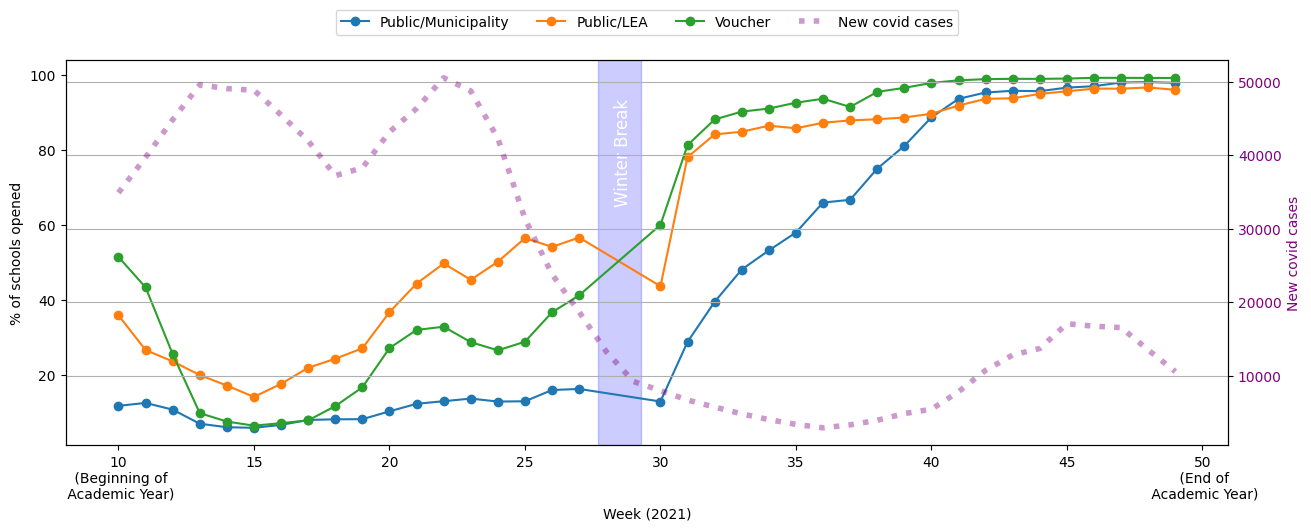

In [12]:
fig,ax = plt.subplots(figsize=(15,5))
dict_dep[0].rename(columns = {'Open': 'Public/Municipality', 'Week_Number': 'Week (2021)'}).groupby('Week (2021)').mean()[['Public/Municipality']].plot(ax = ax,  marker = 'o')
dict_dep[3].rename(columns = {'Open': 'Public/LEA', 'Week_Number': 'Week (2021)'}).groupby('Week (2021)').mean()[['Public/LEA']].plot(ax = ax,  marker = 'o')
dict_dep[1].rename(columns = {'Open': 'Voucher', 'Week_Number': 'Week (2021)'}).groupby('Week (2021)').mean()[['Voucher']].plot(ax = ax,  marker = 'o')

# Agregar la región vertical para el break de invierno
ax.axvspan(27.7, 29.3, alpha=0.2, color='blue')
ax.text(28.3, 65, 'Winter Break', rotation=90, verticalalignment='bottom', color='white', fontsize=12)

plt.ylabel('% of schools opened')

# Change the label of the first x-tick (index 0)
new_labels = [item.get_text() if item.get_text() != '10' else '10\n (Beginning of\n Academic Year)' for item in ax.get_xticklabels()]
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(new_labels)

# Change the label of the first x-tick (index 0)
new_labels = [item.get_text() if item.get_text() != '50' else '50\n (End of\n Academic Year)' for item in ax.get_xticklabels()]
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(new_labels)

# Creating the secondary y-axis
ax2 = ax.twinx()
df_plot.rename(columns = {'New_cases':'New covid cases', 'Week_Number': 'Week (2021)'}).plot(ax = ax2, x = 'Week (2021)', y = 'New covid cases', linestyle = ':', linewidth = 4, alpha = 0.4, color = 'purple', legend=None) 
plt.ylabel('New covid cases', color = 'purple')

# Change the y-tick labels' color on the right y-axis to purple
for label in ax2.get_yticklabels():
    label.set_color('purple')

plt.grid(True)

# Legend configurations: placing it outside at the top and center
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4)

plt.savefig('descriptive.png', dpi = 200, bbox_inches='tight')
plt.show()

# Full school level data

In [13]:
df_calendario = df_tot[['month','day','Week_Number']].drop_duplicates()

In [14]:
for case in ['Apertura_EE_2021_Marzo.csv','Apertura_EE_2021_Abril.csv','Apertura_EE_2021_Mayo.csv',
             'Apertura_EE_2021_Junio.csv','Apertura_EE_2021_Julio.csv','Apertura_EE_2021_Agosto.csv',
             'Apertura_EE_2021_Septiembre.csv','Apertura_EE_2021_Octubre.csv','Apertura_EE_2021_Noviembre.csv',
             'Apertura_EE_2021_Diciembre.csv']:
    
    print(case)
    data = pd.read_csv(case, sep = ';')
    data = data[data.ORIGEN == 1]
    data = data[data.DEPENDENCIA.isin([1,2,6])]
    data['SLEP'] = data.DEPENDENCIA.replace({1:0,2:0,6:1})
    month = case.split('_')[-1].split('.')[0]
    
    dia_columns = [x for x in data.columns if 'DIA' in x]

    dict_week = {}
    week_list = []
    for col in dia_columns:
        data[col] = data[col].replace({'Abierto':1, 'En cuarentena': 0, 'Cerrado':0,'Sin información': np.nan })
        data[col] = pd.to_numeric(data[col])
        try:
            day = int(col[-2:])
        except:
            day = int(col[-1:])
            
        week = df_calendario.loc[(df_calendario.month == dict_month[month]) & 
                                 (df_calendario.day == day)].Week_Number.values[0]

        dict_week[col] = week

        week_list += [week]

    unique_list = list(set(week_list))

    df_mes = data.rename(columns = dict_week)[['ID_ESTAB'] + unique_list]

    if month == 'Marzo':
         df_tot = data.rename(columns = dict_week)[['ID_ESTAB', 'COD_COM_ESTAB','RURAL_ESTAB', 'MAT_TOTAL', 'SLEP'] + unique_list]
    else:
        df_tot = pd.merge(df_tot, df_mes, on = 'ID_ESTAB', how = 'left', validate = 'one_to_one')
    

Apertura_EE_2021_Marzo.csv
Apertura_EE_2021_Abril.csv
Apertura_EE_2021_Mayo.csv
Apertura_EE_2021_Junio.csv
Apertura_EE_2021_Julio.csv
Apertura_EE_2021_Agosto.csv
Apertura_EE_2021_Septiembre.csv
Apertura_EE_2021_Octubre.csv
Apertura_EE_2021_Noviembre.csv
Apertura_EE_2021_Diciembre.csv


In [15]:
for col in df_tot.columns:
    if '_x' in str(col) or '_y' in str(col):
        df_tot = df_tot.rename(columns = {col: int(col.split('_')[0])})

In [16]:
df_tot = df_tot.groupby(['COD_COM_ESTAB'], as_index=False).mean()

In [17]:
n = 0
for week in list(set(df_tot.columns)):
    if 'ID' not in str(week):
        print(week)
        if n == 0:
            df_fin = pd.concat([df_tot[['ID_ESTAB']], df_tot[[week]].mean(axis = 1) ], axis = 1)
            df_fin.columns = ['ID_ESTAB',week]
        else:
            cols = df_fin.columns
            df_fin = pd.concat([df_fin, df_tot[[week]].mean(axis = 1) ], axis = 1)
            df_fin.columns = list(cols) + [week]

        n+=1
        

COD_COM_ESTAB
SLEP
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
MAT_TOTAL
RURAL_ESTAB


In [18]:
df_fin = df_fin[['COD_COM_ESTAB','MAT_TOTAL',    'RURAL_ESTAB','SLEP',            
                        10,              11,              12,
                        13,              14,              15,
                        16,              17,              18,              19,
                        20,              21,              22,              23,
                        24,              25,              26,              27,
                        30,              31,              32,
                        33,              34,              35,              36,
                        37,              38,              39,              40,
                        41,              42,              43,              44,
                        45,              46,              47,              48,
                        49]]

In [19]:
df_fin['RURAL_ESTAB'] = (df_fin.RURAL_ESTAB>=0.83).astype(int)
df_fin['MAT_TOTAL'] = (df_fin.MAT_TOTAL>=400).astype(int)

## Add simce

In [20]:
data_ee = pd.read_csv('EE_18.csv')

In [21]:
data_ee = data_ee[['RBD','COD_COM_RBD']]
data_ee.columns = [x.lower() for x in data_ee.columns]

In [22]:
for file in os.listdir():
    if 'simce' in file:
        print(file)

simce2m2018_alu_privada_final-SEG.txt
simce2m2022_alu_mrun_final_SEG.csv
simce4b2018_alu_privada_final-SEG.txt
simce4b2022_alu_mrun_final_SEG.csv


In [23]:
data_4b2018 = pd.read_csv(r'simce4b2018_alu_privada_final-SEG.txt', sep = '|')
df_simce = data_4b2018[['rbd','ptje_mate4b_alu', 'ptje_lect4b_alu' ]].groupby(['rbd'], as_index=False).mean()
df_simce =  df_simce.rename(columns = {'ptje_mate4b_alu':'math_2018', 'ptje_lect4b_alu':'reading_2018'})

data_2m2018 = pd.read_csv(r'simce2m2018_alu_privada_final-SEG.txt', sep = '|')
df_simce2 = data_2m2018[['rbd','ptje_mate2m_alu', 'ptje_lect2m_alu' ]].groupby(['rbd'], as_index=False).mean()
df_simce2 =  df_simce2.rename(columns = {'ptje_mate2m_alu':'math_2018', 'ptje_lect2m_alu':'reading_2018'})
df_simce =  pd.concat([df_simce, df_simce2], axis = 0)

df_simce18 = df_simce.groupby(['rbd'], as_index = False).mean()

df_simce18 = pd.merge(df_simce18, data_ee, on = 'rbd', how = 'left',validate = 'one_to_one')
df_simce18 = df_simce18.drop(columns = ['rbd']).groupby(['cod_com_rbd'], as_index = False).mean()

In [24]:
data_4b2022 = pd.read_csv(r'simce4b2022_alu_mrun_final_SEG.csv', sep = '|')
df_simce = data_4b2022[['rbd','ptje_mate4b_alu', 'ptje_lect4b_alu' ]].groupby(['rbd'], as_index=False).mean()
df_simce =  df_simce.rename(columns = {'ptje_mate4b_alu':'math_2022', 'ptje_lect4b_alu':'reading_2022'})

data_2m2022 = pd.read_csv(r'simce2m2022_alu_mrun_final_SEG.csv', sep = '|')
df_simce2 = data_2m2022[['rbd','ptje_mate2m_alu', 'ptje_lect2m_alu' ]].groupby(['rbd'], as_index=False).mean()
df_simce2 =  df_simce2.rename(columns = {'ptje_mate2m_alu':'math_2022', 'ptje_lect2m_alu':'reading_2022'})
df_simce =  pd.concat([df_simce, df_simce2], axis = 0)

df_simce22 = df_simce.groupby(['rbd'], as_index = False).mean()

df_simce22 = pd.merge(df_simce22, data_ee, on = 'rbd', how = 'left',validate = 'one_to_one')
df_simce22 = df_simce22.drop(columns = ['rbd']).groupby(['cod_com_rbd'], as_index = False).mean()

In [25]:
df_simce_tot = pd.merge(df_simce18, df_simce22, on = 'cod_com_rbd', how = 'inner', validate = 'one_to_one')

mat_mean = df_simce_tot.math_2018.mean()
mat_sd = df_simce_tot.math_2018.std()

read_mean = df_simce_tot.reading_2018.mean()
read_sd = df_simce_tot.reading_2018.std() 

df_simce_tot['math_2018'] = (df_simce_tot['math_2018'] - mat_mean)/mat_sd
df_simce_tot['math_2022'] = (df_simce_tot['math_2022'] - mat_mean)/mat_sd

df_simce_tot['reading_2018'] = (df_simce_tot['reading_2018'] - read_mean)/read_sd
df_simce_tot['reading_2022'] = (df_simce_tot['reading_2022'] - read_mean)/read_sd


In [26]:
df_simce_tot = df_simce_tot.rename(columns = {'cod_com_rbd':'COD_COM_ESTAB'})

In [27]:
df_simce_tot['math_loss'] = df_simce_tot.math_2022  - df_simce_tot.math_2018
df_simce_tot['reading_loss'] = df_simce_tot.reading_2022  - df_simce_tot.reading_2018

In [28]:
df_simce_tot['mean_loss'] = 0.5*(df_simce_tot.math_loss  + df_simce_tot.reading_loss)

<Axes: >

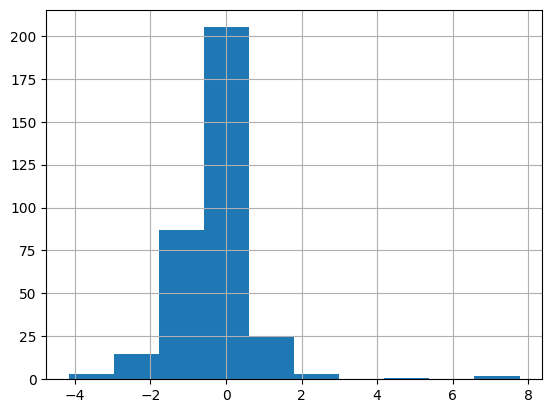

In [29]:
df_simce_tot.reading_loss.hist()

In [30]:
df_fin2 = pd.merge(df_fin, df_simce_tot, on = 'COD_COM_ESTAB', how = 'left', validate = 'one_to_one')

## Save

In [31]:
df_fin2 = df_fin2[['COD_COM_ESTAB',     'MAT_TOTAL',   'RURAL_ESTAB',          'SLEP',  'math_2018',  'reading_2018',
           'math_2022',  'reading_2022' , 'math_loss','reading_loss','mean_loss',
                   10,              11,              12,              13,
                    14,              15,              16,              17,
                    18,              19,              20,              21,
                    22,              23,              24,              25,
                    26,              27,              30,              31,
                    32,              33,              34,              35,
                    36,              37,              38,              39,
                    40,              41,              42,              43,
                    44,              45,              46,              47,
                    48,              49]]

In [32]:
df_fin2.loc[df_fin2.mean_loss>2,'mean_loss'] = 2
df_fin2.loc[df_fin2.mean_loss<-2,'mean_loss'] = -2

In [33]:
df_fin2.to_csv('weekly_school_openings_county_2021_chile.csv')

In [34]:
df_fin2.columns

Index(['COD_COM_ESTAB',     'MAT_TOTAL',   'RURAL_ESTAB',          'SLEP',
           'math_2018',  'reading_2018',     'math_2022',  'reading_2022',
           'math_loss',  'reading_loss',     'mean_loss',              10,
                    11,              12,              13,              14,
                    15,              16,              17,              18,
                    19,              20,              21,              22,
                    23,              24,              25,              26,
                    27,              30,              31,              32,
                    33,              34,              35,              36,
                    37,              38,              39,              40,
                    41,              42,              43,              44,
                    45,              46,              47,              48,
                    49],
      dtype='object')

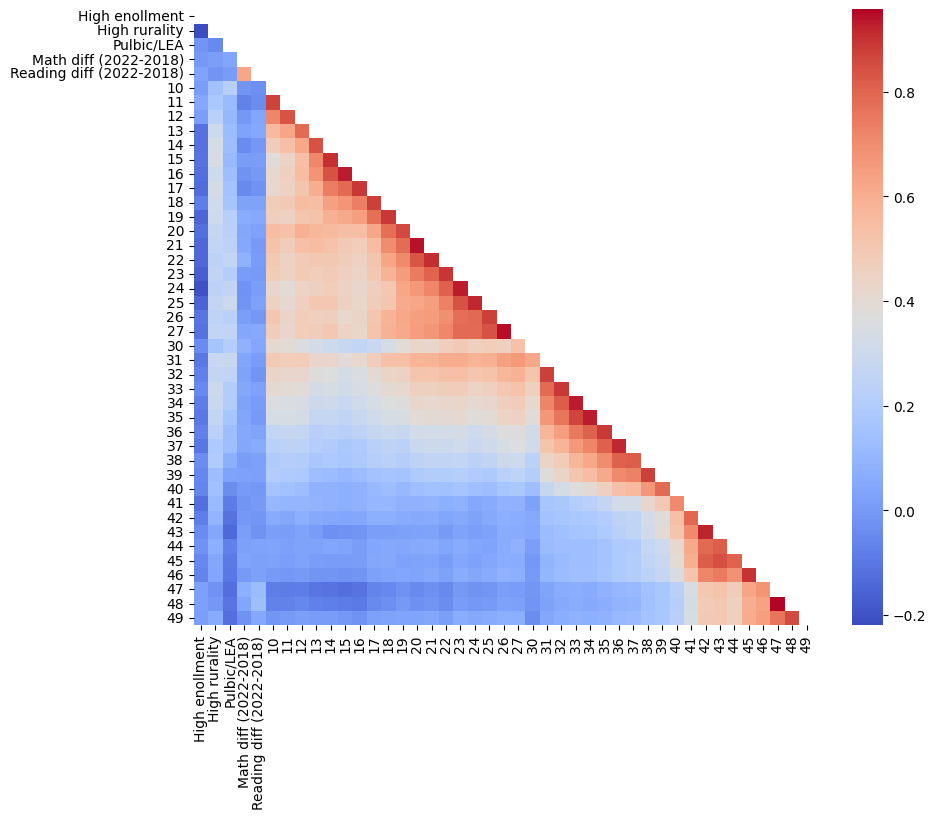

In [35]:
import seaborn as sns

correlation_matrix = df_fin2[['MAT_TOTAL','RURAL_ESTAB','SLEP','math_loss',  'reading_loss', 
                              10,
                    11,              12,              13,              14,
                    15,              16,              17,              18,
                    19,              20,              21,              22,
                    23,              24,              25,              26,
                    27,              30,              31,              32,
                    33,              34,              35,              36,
                    37,              38,              39,              40,
                    41,              42,              43,              44,
                    45,              46,              47,              48,
                    49]].rename(columns = {'MAT_TOTAL': 'High enollment',
                                           'RURAL_ESTAB': 'High rurality',
                                           'SLEP': 'Pulbic/LEA',
                                           'math_loss':'Math diff (2022-2018)', 
                                           'reading_loss':'Reading diff (2022-2018)'}).corr()



# Mask to hide the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a figure and set its size
plt.figure(figsize=(10, 8))

# Create a heatmap using Seaborn with the mask and no annotations
heatmap = sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', mask=mask)

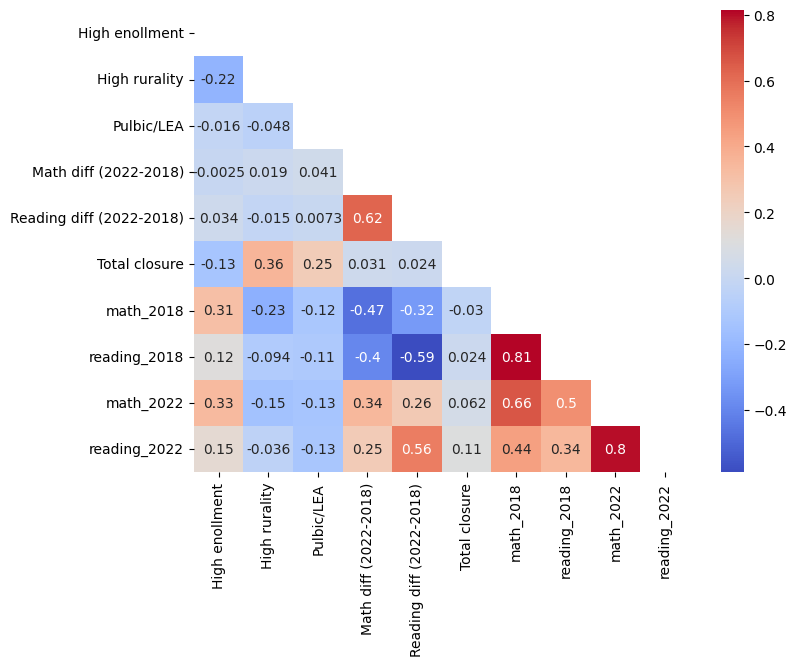

In [37]:
import seaborn as sns

df_fin2['Total closure'] =  df_fin2[[10,
                    11,              12,              13,              14,
                    15,              16,              17,              18,
                    19,              20,              21,              22,
                    23,              24,              25,              26,
                    27,              30,              31,              32,
                    33,              34,              35,              36,
                    37,              38,              39,              40,
                    41,              42,              43,              44,
                    45,              46,              47,              48,
                    49]].mean(axis = 1)

correlation_matrix = df_fin2[['MAT_TOTAL','RURAL_ESTAB','SLEP','math_loss',  'reading_loss','Total closure',
                              'math_2018',  'reading_2018',     'math_2022',  'reading_2022'
                              ]].rename(columns = {'MAT_TOTAL': 'High enollment',
                                           'RURAL_ESTAB': 'High rurality',
                                           'SLEP': 'Pulbic/LEA',
                                           'math_loss':'Math diff (2022-2018)', 
                                           'reading_loss':'Reading diff (2022-2018)'}).corr()



# Mask to hide the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a figure and set its size
plt.figure(figsize=(8, 6))

# Create a heatmap using Seaborn with the mask and no annotations
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=mask)

# Descritive table

In [38]:
# Generate a DataFrame of summary statistics
summary_stats = df_fin2.describe().T

# Calculate missing values count per column
missing_count = df_fin2.isnull().sum()

# Round summary statistics to 3 decimal places
summary_stats = np.round(summary_stats, 3)

# Add the missing count as a new column
summary_stats['Missing Count'] = missing_count

summary_stats.to_excel('summary_statistics.xlsx')

print(summary_stats)

               count      mean       std       min       25%       50%  \
COD_COM_ESTAB  345.0  9025.817  3819.867  1101.000  6109.000  8313.000   
MAT_TOTAL      345.0     0.162     0.369     0.000     0.000     0.000   
RURAL_ESTAB    345.0     0.252     0.435     0.000     0.000     0.000   
SLEP           345.0     0.119     0.324     0.000     0.000     0.000   
math_2018      323.0    -0.020     1.008    -4.076    -0.522     0.017   
reading_2018   323.0    -0.027     0.998    -5.908    -0.465     0.002   
math_2022      319.0    -0.401     0.874    -5.768    -0.874    -0.417   
reading_2022   321.0    -0.248     0.910    -3.696    -0.682    -0.272   
math_loss      318.0    -0.437     0.738    -4.442    -0.802    -0.442   
reading_loss   320.0    -0.264     1.043    -4.167    -0.672    -0.265   
mean_loss      318.0    -0.372     0.624    -2.000    -0.688    -0.378   
10             345.0     0.205     0.360     0.000     0.000     0.000   
11             345.0     0.198     0.3

In [39]:
np.round(df_fin2.describe().T, 3)

,count,mean,std,min,25%,50%,75%,max
COD_COM_ESTAB,345.0,9025.817,3819.867,1101.000,6109.000,8313.000,13103.000,16305.000
MAT_TOTAL,345.0,0.162,0.369,0.000,0.000,0.000,0.000,1.000
RURAL_ESTAB,345.0,0.252,0.435,0.000,0.000,0.000,1.000,1.000
SLEP,345.0,0.119,0.324,0.000,0.000,0.000,0.000,1.000
math_2018,323.0,-0.020,1.008,-4.076,-0.522,0.017,0.535,4.199
reading_2018,323.0,-0.027,0.998,-5.908,-0.465,0.002,0.437,3.674
math_2022,319.0,-0.401,0.874,-5.768,-0.874,-0.417,0.006,3.814
reading_2022,321.0,-0.248,0.910,-3.696,-0.682,-0.272,0.157,5.185
math_loss,318.0,-0.437,0.738,-4.442,-0.802,-0.442,-0.097,4.404
reading_loss,320.0,-0.264,1.043,-4.167,-0.672,-0.265,0.090,7.773


# Learning Loss graph

## Math

In [164]:
df_fin2['math_2018_deciles'] = pd.qcut(df_fin2.math_2018,10, labels=False)    
scores_mean = df_fin2.groupby(['math_2018_deciles'] )['math_loss'].mean()
scores_sd = df_fin2.groupby(['math_2018_deciles'] )['math_loss'].std()

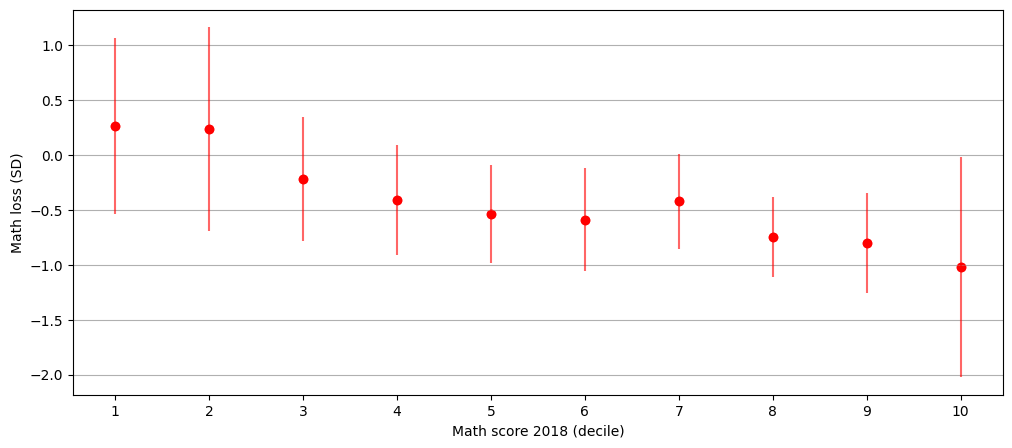

In [165]:
fig, ax = plt.subplots(figsize=(12,5))
x = range(10)
# Creating a scatter plot
ax.scatter(x, scores_mean, alpha = 1, color = 'red')
# Adding error bars
ax.errorbar(x, scores_mean, yerr=scores_sd, fmt='o', alpha = 0.6, color = 'red')

# curve 
#p = Polynomial.fit(x, scores_mean, 1)
#x_linspace = np.linspace(0, 9, 10)
#ax.plot(x_linspace, p(x_linspace), color='red')

ax.set_xticks(range(10), [str((x+1)) for x in range(0,10)])
plt.xlabel("Math score 2018 (decile)")
plt.ylabel("Math loss (SD)")
ax.yaxis.grid() 

## Reading

In [157]:
df_fin2['reading_2018_deciles'] = pd.qcut(df_fin2.reading_2018,10, labels=False)    
scores_mean = df_fin2.groupby(['reading_2018_deciles'] )['reading_loss'].mean()
scores_sd = df_fin2.groupby(['reading_2018_deciles'] )['reading_loss'].std()

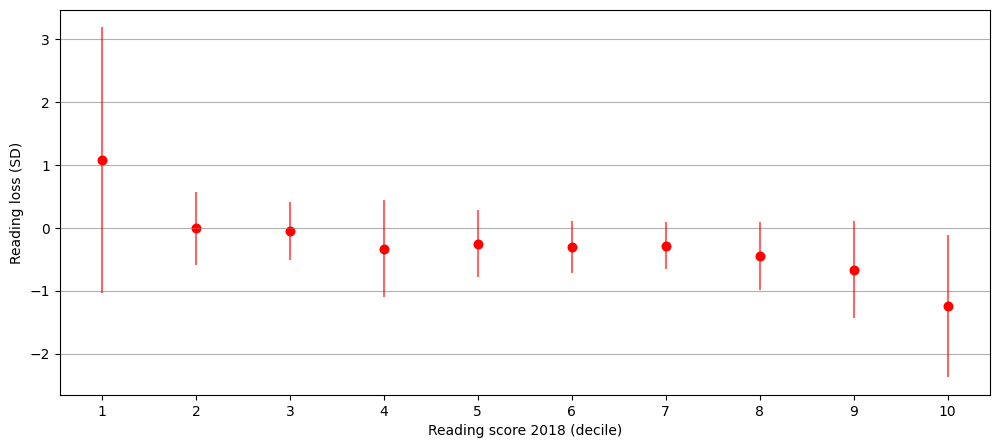

In [162]:
fig, ax = plt.subplots(figsize=(12,5))
x = range(10)
# Creating a scatter plot
ax.scatter(x, scores_mean, alpha = 1, color = 'red')
# Adding error bars
ax.errorbar(x, scores_mean, yerr=scores_sd, fmt='o', alpha = 0.6, color = 'red')

# curve 
#p = Polynomial.fit(x, scores_mean, 1)
#x_linspace = np.linspace(0, 9, 10)
#ax.plot(x_linspace, p(x_linspace), color='red')

ax.set_xticks(range(10), [str((x+1)) for x in range(0,10)])
plt.xlabel("Reading score 2018 (decile)")
plt.ylabel("Reading loss (SD)")
ax.yaxis.grid() 

## % closed vs learning loss

### MATH

<Axes: >

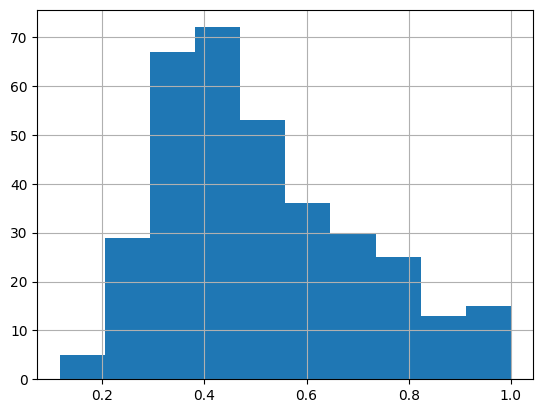

In [176]:
df_fin2['Total closure'].hist()

In [177]:
df_fin2['closure_decile'] = pd.qcut(df_fin2['Total closure'],5, labels=False)    
scores_mean = df_fin2.groupby(['closure_decile'] )['reading_loss'].mean()
scores_sd = df_fin2.groupby(['closure_decile'] )['reading_loss'].std()

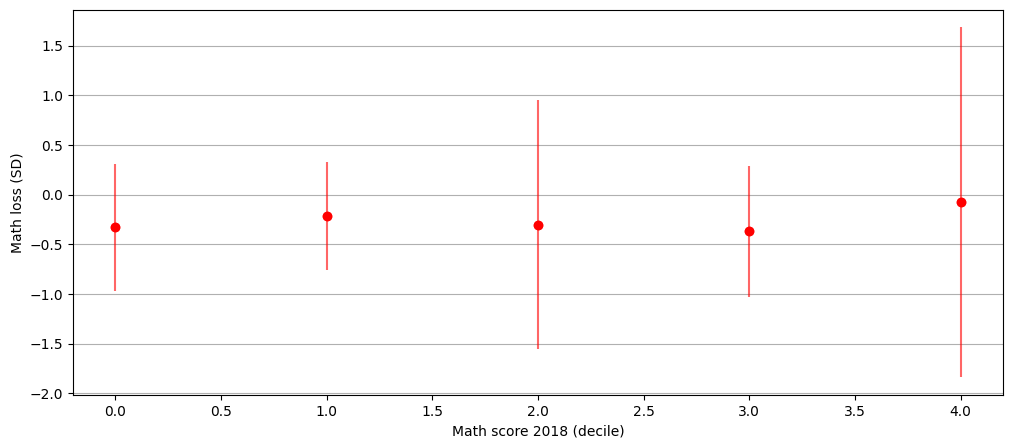

In [178]:
fig, ax = plt.subplots(figsize=(12,5))
x = range(5)
# Creating a scatter plot
ax.scatter(x, scores_mean, alpha = 1, color = 'red')
# Adding error bars
ax.errorbar(x, scores_mean, yerr=scores_sd, fmt='o', alpha = 0.6, color = 'red')

# curve 
#p = Polynomial.fit(x, scores_mean, 1)
#x_linspace = np.linspace(0, 9, 10)
#ax.plot(x_linspace, p(x_linspace), color='red')

#ax.set_xticks(range(10), [str((x+1)) for x in range(0,10)])
plt.xlabel("Math score 2018 (decile)")
plt.ylabel("Math loss (SD)")
ax.yaxis.grid() 